# Regression assumptions

## Example 1

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
# Generate a synthetic dataset that satisfies the assumptions
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the test set
y_pred = model.predict(X_test)

In [30]:
# Residuals
residuals = y_test - y_pred

# Create a DataFrame for easier plotting
df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'residuals': residuals})

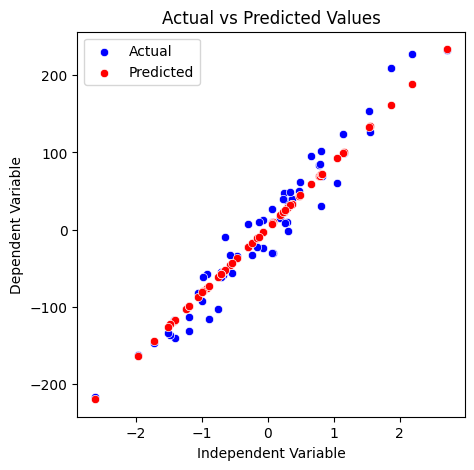

In [31]:
# Plotting data and regression
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual', color='blue')
sns.scatterplot(x=X_test.flatten(), y=y_pred, label='Predicted', color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

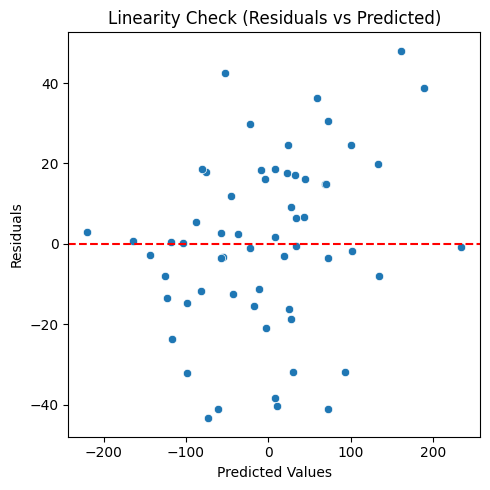

In [32]:
# Plot 1: Linearity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')
plt.tight_layout()
plt.show()

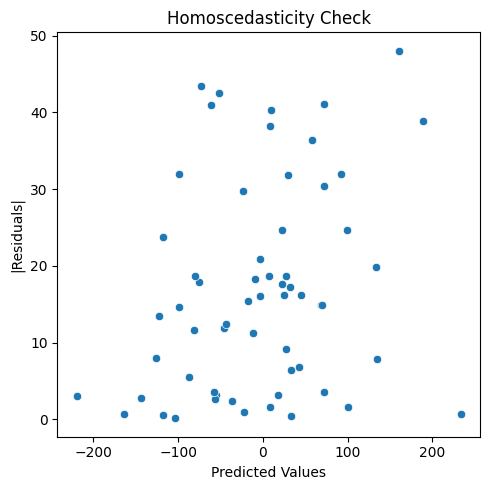

In [33]:
# Plot 2: Homoscedasticity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')
plt.tight_layout()
plt.show()

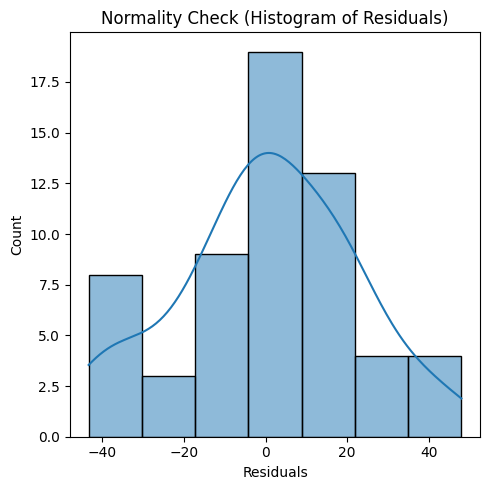

In [34]:
# Plot 3: Normality of Residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')
plt.tight_layout()
plt.show()

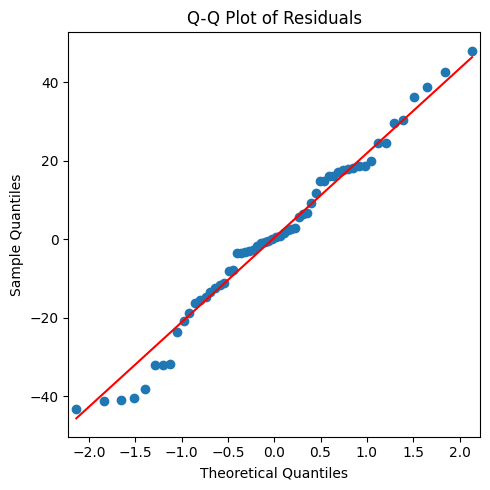

In [35]:
# Plot 4: Q-Q plot
plt.figure(figsize=(5, 5))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

## Example 2

In [36]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
# Generate a synthetic dataset that does not satisfy the assumptions
# Introduce non-linearity and heteroscedasticity
np.random.seed(42)
X_non_linear = np.random.uniform(-3, 3, 200).reshape(-1, 1)
y_non_linear = X_non_linear**3 + np.random.normal(0, 5 + X_non_linear.flatten()**2, 200)

# Split data into training and testing sets
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_non_linear, y_non_linear, test_size=0.3, random_state=42)

In [38]:
# Fit a Linear Regression model
model_nl = LinearRegression()
model_nl.fit(X_train_nl, y_train_nl)

# Predict the values using the test set
y_pred_nl = model_nl.predict(X_test_nl)

# Residuals
residuals_nl = y_test_nl - y_pred_nl

In [39]:
# Flatten the residuals and other variables to resolve the dimension issue
y_test_nl = y_test_nl.flatten()
y_pred_nl = y_pred_nl.flatten()
residuals_nl = residuals_nl.flatten()

In [40]:
# Create a DataFrame for easier plotting
df_nl = pd.DataFrame({'y_test': y_test_nl, 'y_pred': y_pred_nl, 'residuals': residuals_nl})

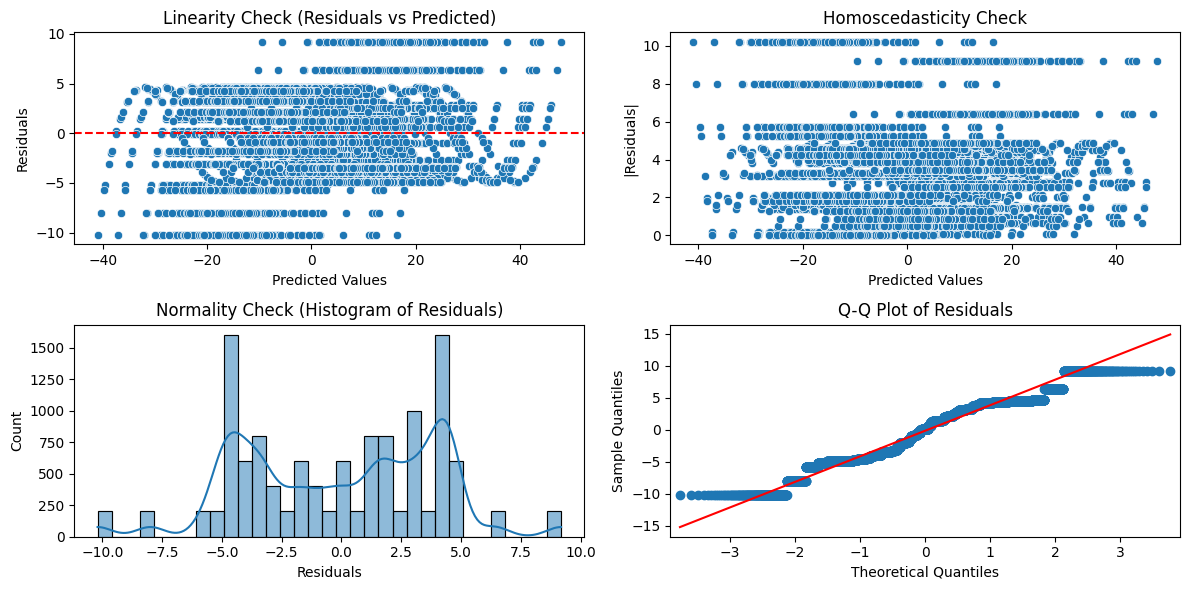

In [41]:
# Plot 1: Linearity
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_nl, y=residuals_nl)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_nl, y=np.abs(residuals_nl))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals_nl, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals_nl, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Exercise 3: Wine Dataset

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


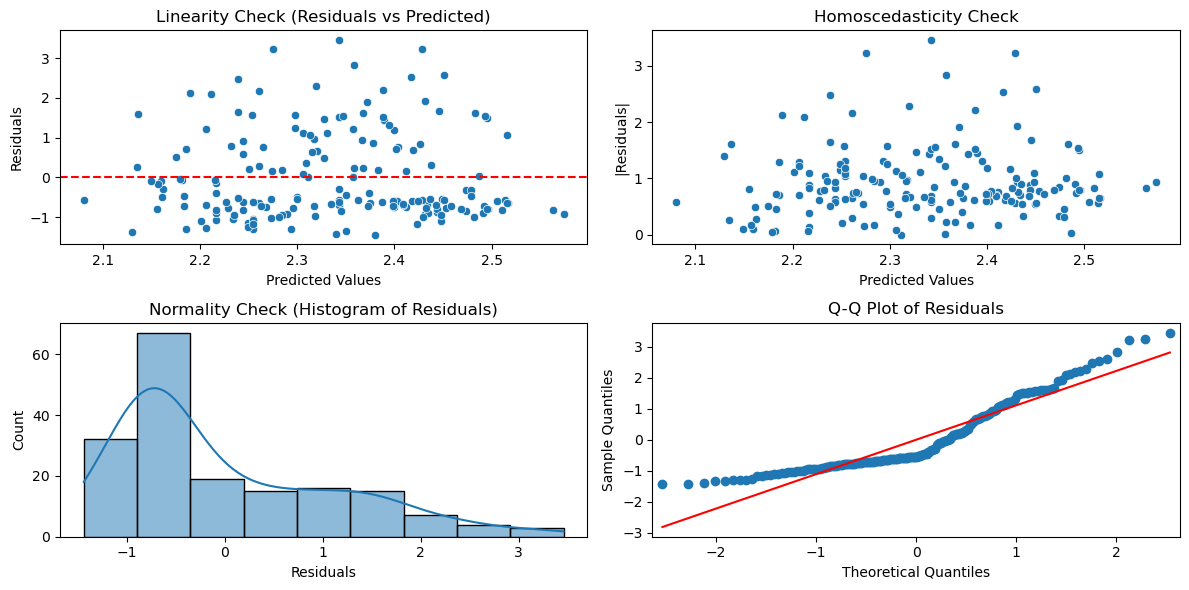

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression

# Cargar el dataset de vino
wine = load_wine()
X = wine.data  # Características (features)
y = wine.target  # Etiquetas (target)

# Convertir a DataFrame para facilitar la manipulación
wine_df = pd.DataFrame(X, columns=wine.feature_names)

# Para este ejemplo, seleccionamos una de las características para la regresión
# Usaremos 'alcohol' como variable independiente y 'malic_acid' como variable dependiente
X = wine_df[['alcohol']]
y = wine_df['malic_acid']

# Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir valores
y_pred = model.predict(X)

# Calcular residuales
residuals = y - y_pred

# Gráficas
plt.figure(figsize=(12, 6))

# Plot 1: Linearity Check
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity Check
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality Check
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q Plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


Exercise 4: Advertising Dataset

In [12]:
import pandas as pd

# Cargar el Advertising Dataset (asegúrate de que el archivo está en el directorio correcto)
# Cambia el nombre del archivo según sea necesario
advertising_df = pd.read_csv('/Users/diegosanchez/Documents/universidad copy/Semestre 7/notebooks_gsus/db/advertising.csv')  # Reemplaza con tu archivo

# Muestra las primeras filas para confirmar que se ha cargado correctamente
print(advertising_df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


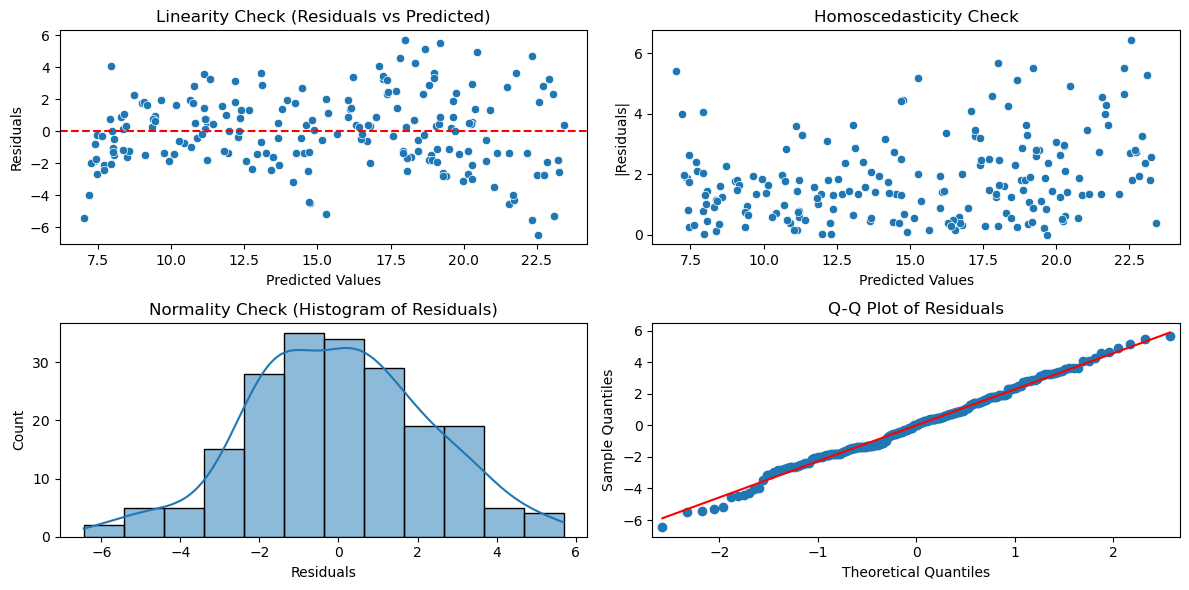

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Supongamos que vamos a predecir 'Sales' usando 'TV' como variable independiente
X = advertising_df[['TV']]  # Variable independiente
y = advertising_df['Sales']  # Variable dependiente

# Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir valores
y_pred = model.predict(X)

# Calcular residuales
residuals = y - y_pred

# Gráficas
plt.figure(figsize=(12, 6))

# Plot 1: Linearity Check
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity Check
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality Check
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q Plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()
